<span style='font-size:x-large'><u>**With Rotation**</u></span>


In [8]:
#Code checked: 09/28/2024, Dumi

# Import libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, cohen_kappa_score, roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Load dataset
# Choose file path for the data to load

# file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
# file_path = 'spica_lum_teff_box_age_ge_1e6.csv'
file_path = 'spica_lum_teff_box_2sigma_age_ge_1e6.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, delimiter=",", header=0)

# Display column names in the dataset
print(data.columns)


Index(['mass', 'z', 'fov', 'mlt', 'age', 'log_k', 'teff', 'lum'], dtype='object')

Testing time: 0.00 seconds
5154


Text(0.5, 1.0, 'Decision Tree: Actual values vs Predicted values')

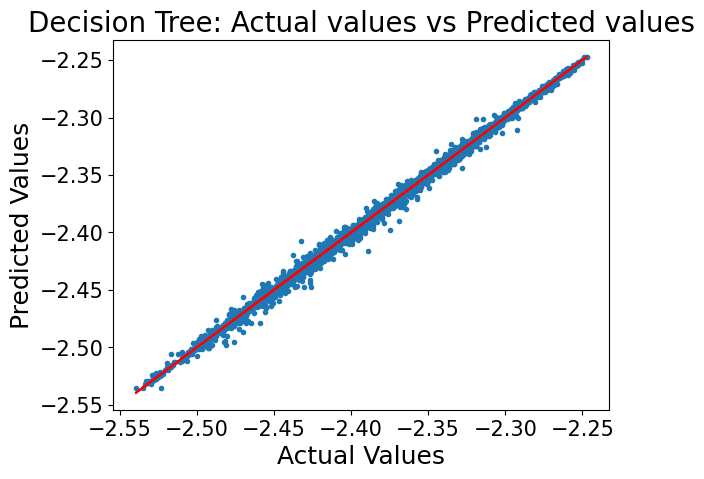

In [9]:
#Training the model

# Prepare the data
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets (80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Build and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=123)
model.fit(x_train, y_train)

# Predict using the trained model
# Test time incorporation
start_time = time.time()
predictions = model.predict(x_test)
end_time = time.time()
test_time = end_time - start_time
print(f"Testing time: {test_time:.2f} seconds")

# Plot the actual vs predicted values
print(np.size(y_test))
fig, ax=plt.subplots()
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.plot(y_test, predictions,'.')
ax.plot(y_test,y_test,color='r')
ax.set_title('Decision Tree: Actual values vs Predicted values',fontsize=20)

In [10]:
# Import evaluation metrics
from sklearn import metrics

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score (model accuracy)
r2 = metrics.r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE) - lower values indicate better performance
mae = metrics.mean_absolute_error(y_test, predictions)

# Print performance metrics
print(f'MSE: {mse:.6f}')
print(f'RMSE: {rmse:.4f}')
print(f'Model Accuracy (R²): {r2 * 100:.2f}%')
print(f'Mean Absolute Error: {mae:.4f}')

MSE: 0.000008
RMSE: 0.0028
Model accuracy is 99.75%
Mean Absolute Error is 0.0018


Text(0, 0.5, 'Frequency')

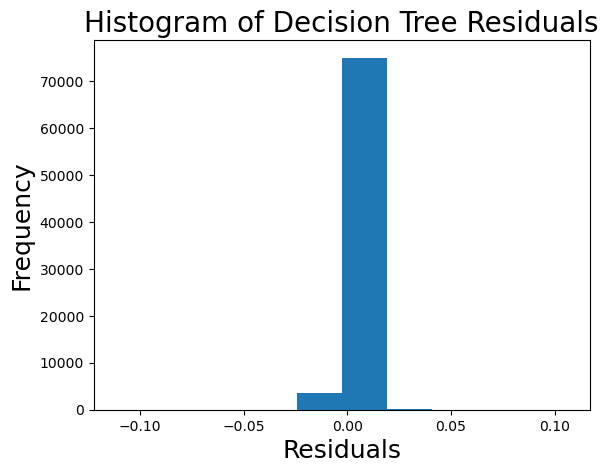

In [7]:

# Plot histogram of residuals (differences between actual and predicted values)
residuals = (y_test - predictions)

# Customize plot appearance
plt.title('Histogram of Decision Tree Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='both', labelsize=15)

# Optional limit settings (uncomment if needed)
# plt.ylim(0, 500)
# plt.xlim(-0.08, 0.08)


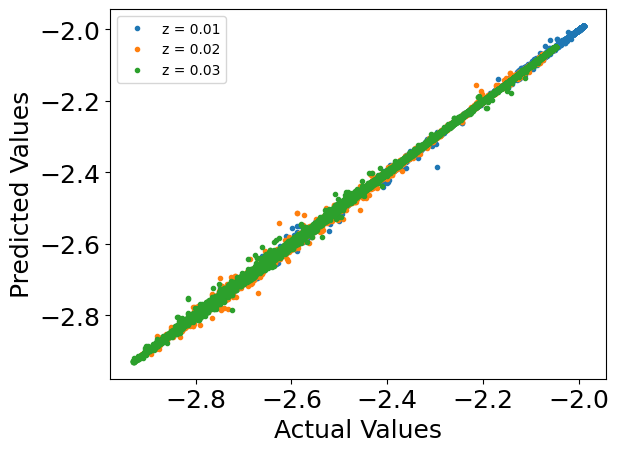

In [5]:
# Reviewing how different metallicities may compare

# Create DataFrame to store actual and predicted values
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

# Initialize plot
fig, ax = plt.subplots()

# Plot predictions for metallicity z = 0.01
z_01 = np.logical_and(x_test['z'] >= 0.01, x_test['z'] <= 0.01)
ax.plot(results[z_01]['y_test'], results[z_01]['predictions'], '.', label='z = 0.01')

# Plot predictions for metallicity z = 0.02
z_02 = np.logical_and(x_test['z'] >= 0.02, x_test['z'] <= 0.02)
ax.plot(results[z_02]['y_test'], results[z_02]['predictions'], '.', label='z = 0.02')

# Plot predictions for metallicity z = 0.03
z_03 = np.logical_and(x_test['z'] >= 0.03, x_test['z'] <= 0.03)
ax.plot(results[z_03]['y_test'], results[z_03]['predictions'], '.', label='z = 0.03')

# Customize plot appearance
ax.set_xlabel("Actual Values", fontsize=18)
ax.set_ylabel("Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend()


## Feature Importance

lum: 1.1772321954184952
teff: 0.6347821848570174
fov: 0.12337437905896735
age: 0.03640406929091652
z: 0.030195763766421812
mass: 0.0021340006129140997
mlt: 0.0006411465951245531


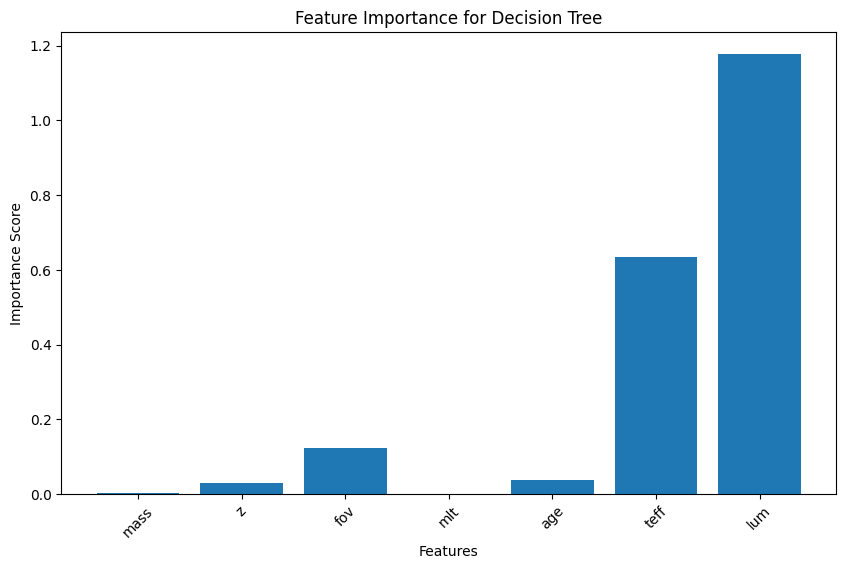

In [11]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Get the importances and their indices
importances = perm_importance.importances_mean
sorted_idx = perm_importance.importances_mean.argsort()
features = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']

# Print the feature importances in descending order
for idx in sorted_idx[::-1]:
    print(f"{features[idx]}: {perm_importance.importances_mean[idx]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()


## Recursive Feature Elimination (RFE)

In [20]:
#Import RFE libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load dataset
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter=",", header=0)

# Define features and target
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=123)

# Initialize RFE with the model to select the best feature
rfe = RFE(estimator=model, n_features_to_select=1)

# Uncomment this line if you want RFE to automatically select half of the features:
# rfe = RFE(estimator=model)

# Fit the RFE model
rfe.fit(x_train, y_train)

# Get selected features
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Print feature ranking (Rank #1 is the best feature)
print("Feature Ranking:", rfe.ranking_)



Selected Features: Index(['age'], dtype='object')
Feature Ranking: [6 4 5 7 1 2 3]


## SHAP

In [12]:
# Install and import SHAP library
!pip install shap
import shap

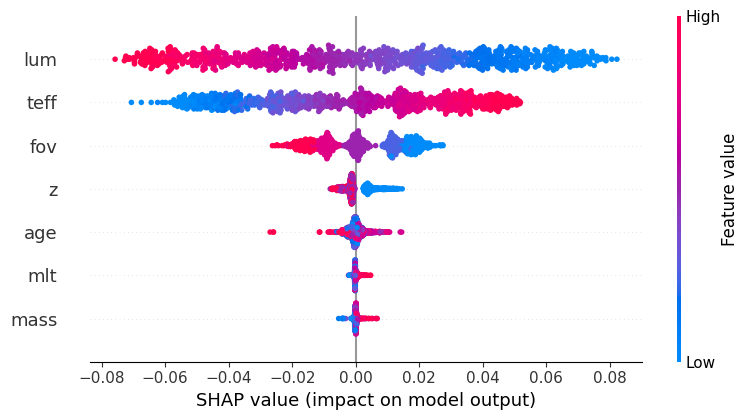

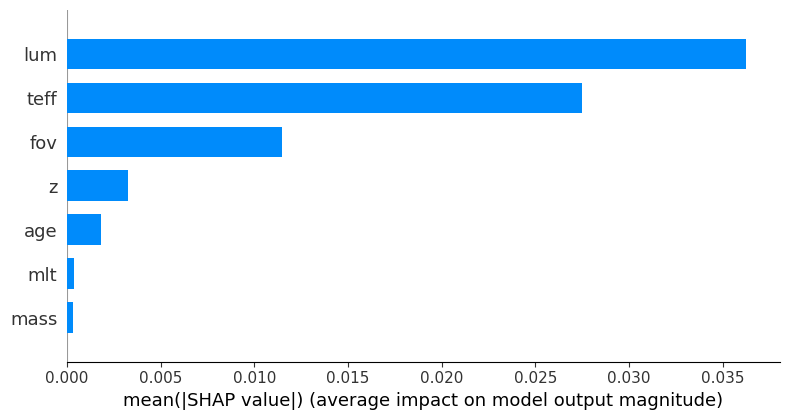

In [13]:
# 10% of the dataset
x_train_sample = x_train.sample(frac=0.1, random_state=42)

# Use KernelExplainer with flattened data
explainer = shap.Explainer(model.predict, x_train_sample[:1000]) 
shap_values = explainer(x_test[:1000])

# Plot SHAP summary and bar chart
shap.summary_plot(shap_values, x_test[:1000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, x_test[:1000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")


In [8]:
### Pickling ###

import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)
